# Trabajo Práctico 1 - Inferencia Estadística y Reconocimiento de Patrones



# Grafico de barras de muestreo *absoluto*

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


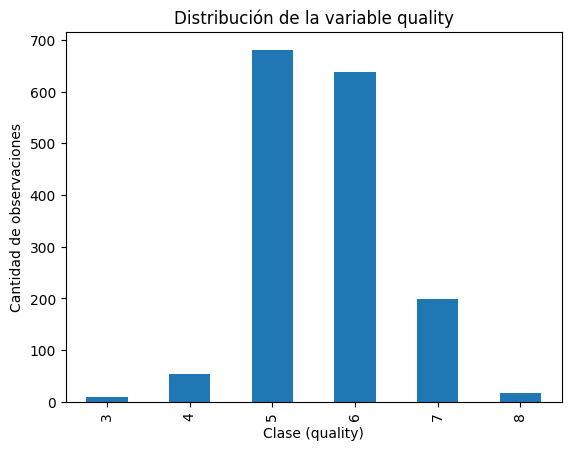

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos (si no está cargado)
df = pd.read_csv('winequality-red.csv', sep=';')

# Conteo de clases
print(df['quality'].value_counts().sort_index())

# Gráfico de barras
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clase (quality)')
plt.ylabel('Cantidad de observaciones')
plt.title('Distribución de la variable quality')
plt.show()

# Grafico de barras de muestreo *PORCENTUAL*

Tabla de distribución de la variable 'quality':

         Frecuencia absoluta  Porcentaje (%)
quality                                     
3                         10            0.63
4                         53            3.31
5                        681           42.59
6                        638           39.90
7                        199           12.45
8                         18            1.13


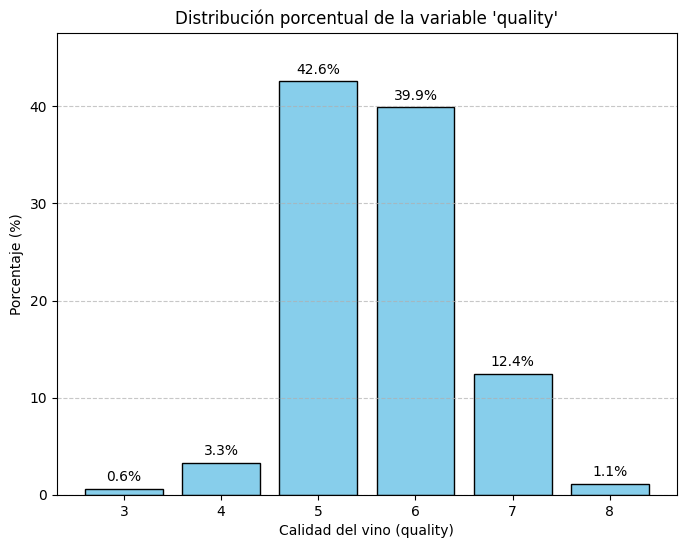

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Cargar dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# --- 2) Calculo de frecuencias y porcentajes
counts = df["quality"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Crear tabla resumen
tabla = pd.DataFrame({
    "Frecuencia absoluta": counts,
    "Porcentaje (%)": percentages.round(2)
})

print("Tabla de distribución de la variable 'quality':\n")
print(tabla)

# --- 3) Gráfico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(counts.index, percentages, color="skyblue", edgecolor="black")

# Etiquetas de porcentaje en cada barra
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)

plt.title("Distribución porcentual de la variable 'quality'")
plt.xlabel("Calidad del vino (quality)")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, max(percentages) + 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Primero, importamos todas las librerias necesarias:

In [4]:

from imblearn.over_sampling import RandomOverSampler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis                 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DESPUES:

* CARGAMOS EL DATASET
* SEPARAMOS LAS VARIABLES PREDICTORAS Y DE RESPUESTA
* USAMOS UN CONJUNTO DE ENTRENAMIENTO 80/20
* Y POR ULTIMO ESCALAMOS Y BALANCEAMOS

In [5]:
# Cargar dataset ---
df = pd.read_csv("winequality-red.csv", sep=";")

# Separar predictoras y respuesta
X = df.drop("quality", axis=1)
y = df["quality"]

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo SOLO en entrenamiento ---
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)


* Creamos una funcion para registrar las metricas (para mas adelante)

In [6]:
# Función para registrar métricas
def registrar_metricas(modelo, y_true, y_pred):
    print(f"\n--- {modelo} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))

# REGRESION LOGISTICA (ESTANDARIZADA Y BALANCEADA)

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Pyth


--- Logística ---
Accuracy: 0.40625
Precision (macro): 0.26461256805459704
Recall (macro): 0.2596549131016043
F1-score (macro): 0.24246451603405894

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.27      0.11        11
           5       0.68      0.54      0.60       136
           6       0.51      0.27      0.36       128
           7       0.34      0.47      0.40        40
           8       0.00      0.00      0.00         3

    accuracy                           0.41       320
   macro avg       0.26      0.26      0.24       320
weighted avg       0.53      0.41      0.45       320

Accuracy medio CV (5 folds, balanceado): 0.5923547400611622


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


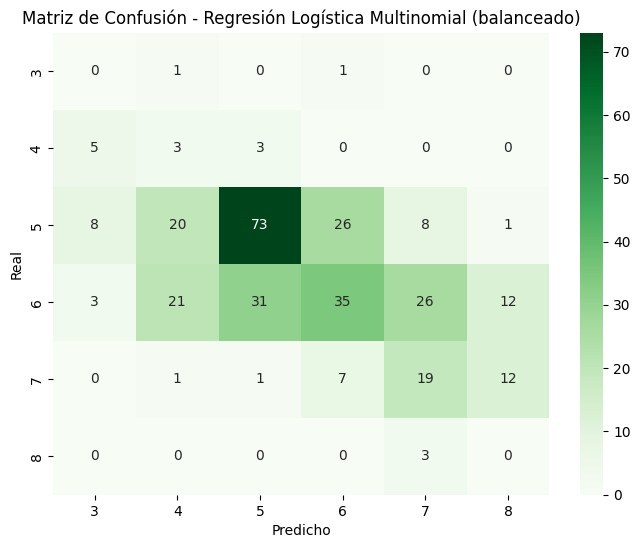

In [7]:
# Modelo Regresión Logística Multinomial 
log_reg_bal = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
log_reg_bal.fit(X_train_bal, y_train_bal)

# Predicciones 
y_pred_log_bal = log_reg_bal.predict(X_test_scaled)
registrar_metricas("Logística", y_test, y_pred_log_bal)

# Evaluación 
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_log_bal))

# Validación cruzada en el set balanceado
scores_log_bal = cross_val_score(log_reg_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_log_bal.mean())

# Matriz de confusión 
cm_bal = confusion_matrix(y_test, y_pred_log_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (balanceado)")
plt.show()


# KNN (ESTANDARIZADA Y BALANCEADA)


--- KNN ---
Accuracy: 0.625
Precision (macro): 0.36296863395500956
Recall (macro): 0.401361036838978
F1-score (macro): 0.37621348694323836

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.18      0.16        11
           5       0.74      0.66      0.70       136
           6       0.64      0.66      0.65       128
           7       0.49      0.57      0.53        40
           8       0.17      0.33      0.22         3

    accuracy                           0.62       320
   macro avg       0.36      0.40      0.38       320
weighted avg       0.64      0.62      0.63       320

Accuracy medio CV (5 folds, balanceado): 0.882874617737003


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

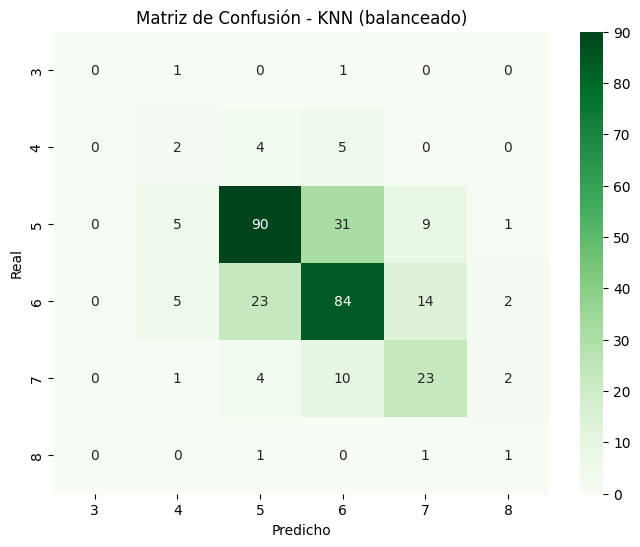

In [8]:
# Modelo KNN (ajustado a 5) 
knn_bal = KNeighborsClassifier(n_neighbors=1)
knn_bal.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn_bal = knn_bal.predict(X_test_scaled)
registrar_metricas("KNN", y_test, y_pred_knn_bal)

# Evaluación 
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_knn_bal))

# Validación cruzada en el set balanceado
scores_knn_bal = cross_val_score(knn_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_knn_bal.mean())

# Matriz de confusión 
cm_bal = confusion_matrix(y_test, y_pred_knn_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (balanceado)")
plt.show()

# bayes ingenuo (estandarizada y balanceada)


--- Naive Bayes ---
Accuracy: 0.321875
Precision (macro): 0.25757975604034716
Recall (macro): 0.18417585784313725
F1-score (macro): 0.20202147357131395

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.42      0.51       136
           6       0.55      0.21      0.31       128
           7       0.34      0.47      0.40        40
           8       0.00      0.00      0.00         3

    accuracy                           0.32       320
   macro avg       0.26      0.18      0.20       320
weighted avg       0.54      0.32      0.39       320

Accuracy medio CV (5 folds, balanceado): 0.482262996941896


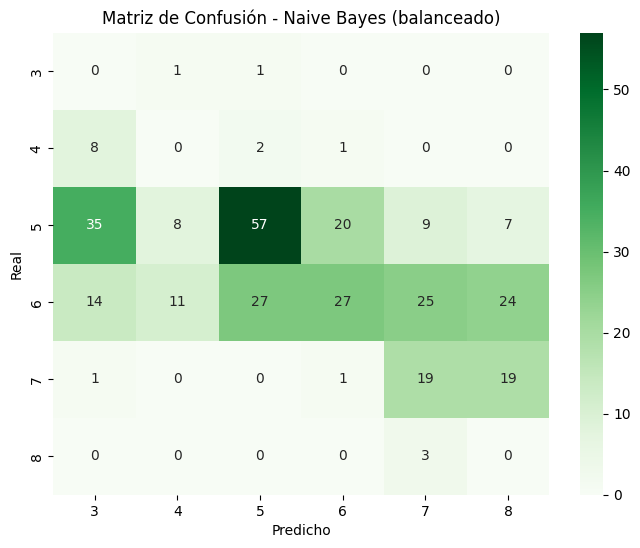

In [9]:
# Modelo Naive Bayes
nb_bal = GaussianNB()
nb_bal.fit(X_train_bal, y_train_bal)

# Predicciones 
y_pred_nb_bal = nb_bal.predict(X_test_scaled)
registrar_metricas("Naive Bayes", y_test, y_pred_nb_bal)

# 5) Evaluación
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_nb_bal))

# Validación cruzada en el set balanceado
scores_nb_bal = cross_val_score(nb_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_nb_bal.mean())

# --- 7) Matriz de confusión ---
cm_bal = confusion_matrix(y_test, y_pred_nb_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes (balanceado)")
plt.show()


# LDA (ESTANDARIZADA Y BALANCEADA)


--- LDA ---
Accuracy: 0.4
Precision (macro): 0.2721001231430087
Recall (macro): 0.24644886363636365
F1-score (macro): 0.2411305550936803

Reporte de clasificación (LDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.04      0.18      0.06        11
           5       0.70      0.50      0.58       136
           6       0.54      0.30      0.38       128
           7       0.36      0.50      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.40       320
   macro avg       0.27      0.25      0.24       320
weighted avg       0.56      0.40      0.46       320

Accuracy medio CV (5 folds, LDA balanceado): 0.5553516819571864


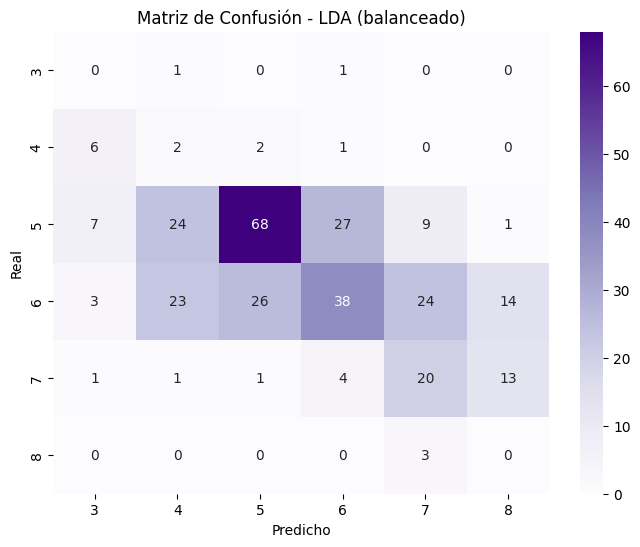

In [10]:
# Modelo LDA 
lda_bal = LinearDiscriminantAnalysis()
lda_bal.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lda_bal = lda_bal.predict(X_test_scaled)
registrar_metricas("LDA", y_test, y_pred_lda_bal)

# Evaluación 
print("\nReporte de clasificación (LDA balanceado):\n", classification_report(y_test, y_pred_lda_bal))

# Validación cruzada en el set balanceado
scores_lda_bal = cross_val_score(lda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, LDA balanceado):", scores_lda_bal.mean())

# Matriz de confusión 
cm_lda_bal = confusion_matrix(y_test, y_pred_lda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_bal, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LDA (balanceado)")
plt.show()

# QDA (ESTANDARIZADO Y BALANCEADO)


--- QDA ---
Accuracy: 0.50625
Precision (macro): 0.32763938320264624
Recall (macro): 0.47668458481877596
F1-score (macro): 0.353091730394362

Reporte de clasificación (QDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.21      0.64      0.31        11
           5       0.66      0.54      0.59       136
           6       0.54      0.45      0.49       128
           7       0.41      0.57      0.48        40
           8       0.15      0.67      0.25         3

    accuracy                           0.51       320
   macro avg       0.33      0.48      0.35       320
weighted avg       0.55      0.51      0.52       320

Accuracy medio CV (5 folds, QDA balanceado): 0.6770642201834862


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

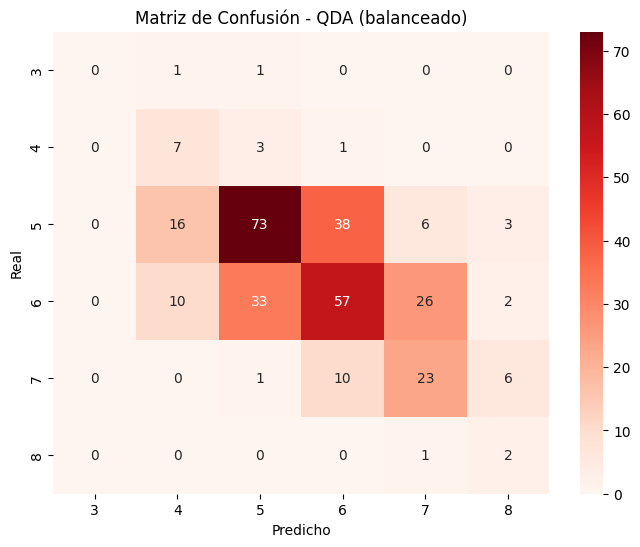

In [11]:
# Modelo QDA 
qda_bal = QuadraticDiscriminantAnalysis()
qda_bal.fit(X_train_bal, y_train_bal)

# Predicciones 
y_pred_qda_bal = qda_bal.predict(X_test_scaled)
registrar_metricas("QDA", y_test, y_pred_qda_bal)

# Evaluación 
print("\nReporte de clasificación (QDA balanceado):\n", classification_report(y_test, y_pred_qda_bal))

# Validación cruzada en el set balanceado
scores_qda_bal = cross_val_score(qda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, QDA balanceado):", scores_qda_bal.mean())

# Matriz de confusión 
cm_qda_bal = confusion_matrix(y_test, y_pred_qda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qda_bal, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.sort(np.unique(y)),
            yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA (balanceado)")
plt.show()



# BOXPLOTS COMPARATIVOS

* Boxplot comparativo de accuracy por modelo (validación cruzada)

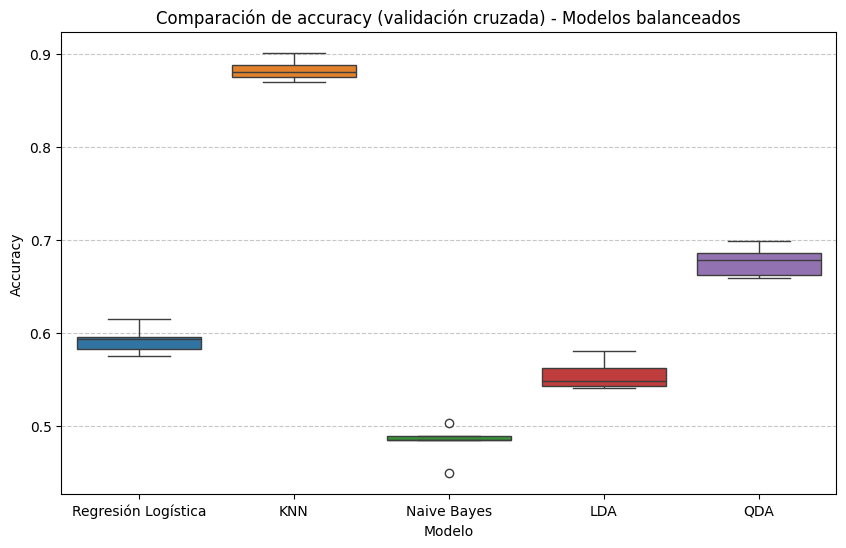

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Guardo los resultados de validación cruzada de cada modelo balanceado para el boxplot posterior
scores_logreg_bal = scores_log_bal   # Regresión logística balanceada
scores_bal_knn = scores_knn_bal # KNN balanceado
scores_bal_nb = scores_nb_bal # Naive Bayes balanceado
scores_bal_lda = scores_lda_bal # LDA balanceado
scores_bal_qda = scores_qda_bal # QDA balanceado

# Creamos DataFrame para boxplot
results = pd.DataFrame({
    'Regresión Logística': scores_log_bal ,  
    'KNN': scores_bal_knn,              
    'Naive Bayes': scores_bal_nb,       
    'LDA': scores_bal_lda,              
    'QDA': scores_bal_qda               
})

plt.figure(figsize=(10,6))
sns.boxplot(data=results)
plt.title('Comparación de accuracy (validación cruzada) - Modelos balanceados')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



* BOXPLOT DE COMPARACIÓN DE METRICAS POR MODELO (BALANCEADO)

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


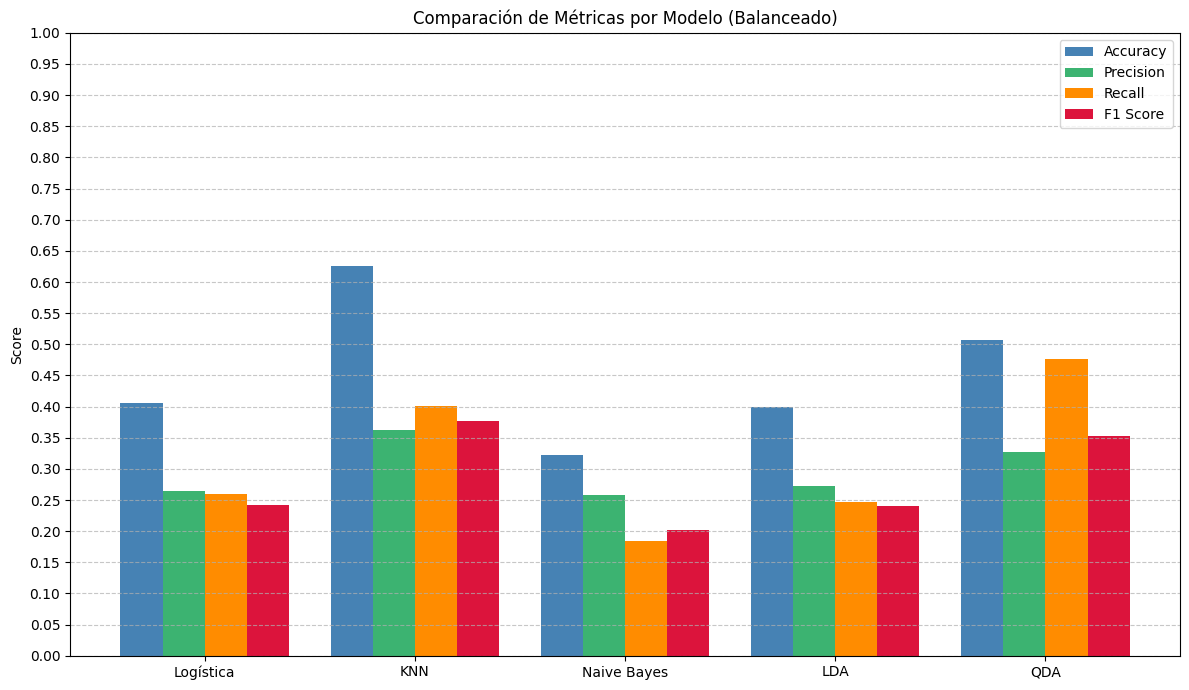

In [14]:
import matplotlib.pyplot as plt
import numpy as np

metricas_modelos = {}

def registrar_metricas(nombre_modelo, y_true, y_pred):
    metricas_modelos[nombre_modelo] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "Recall": recall_score(y_true, y_pred, average="macro"),
        "F1 Score": f1_score(y_true, y_pred, average="macro"),
    }

# Después de entrenar cada modelo:
registrar_metricas("Logística", y_test, y_pred_log_bal)
registrar_metricas("KNN", y_test, y_pred_knn_bal)
registrar_metricas("Naive Bayes", y_test, y_pred_nb_bal)
registrar_metricas("LDA", y_test, y_pred_lda_bal)
registrar_metricas("QDA", y_test, y_pred_qda_bal)

# Extrae métricas del diccionario registrado 
modelos = list(metricas_modelos.keys())
accuracy = [metricas_modelos[m]["Accuracy"] for m in modelos]
precision = [metricas_modelos[m]["Precision"] for m in modelos]
recall = [metricas_modelos[m]["Recall"] for m in modelos]
f1_score_vals = [metricas_modelos[m]["F1 Score"] for m in modelos]

# Preparar gráfico agrupado 
x = np.arange(len(modelos))  # posiciones de los modelos
width = 0.2  # ancho de cada barra

plt.figure(figsize=(12, 7))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='steelblue')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='mediumseagreen')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='darkorange')
plt.bar(x + 1.5*width, f1_score_vals, width, label='F1 Score', color='crimson')

# Personalización del eje Y 
plt.xticks(x, modelos)
plt.yticks(np.arange(0, 1.05, 0.05))  

plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparación de Métricas por Modelo (Balanceado)")
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()